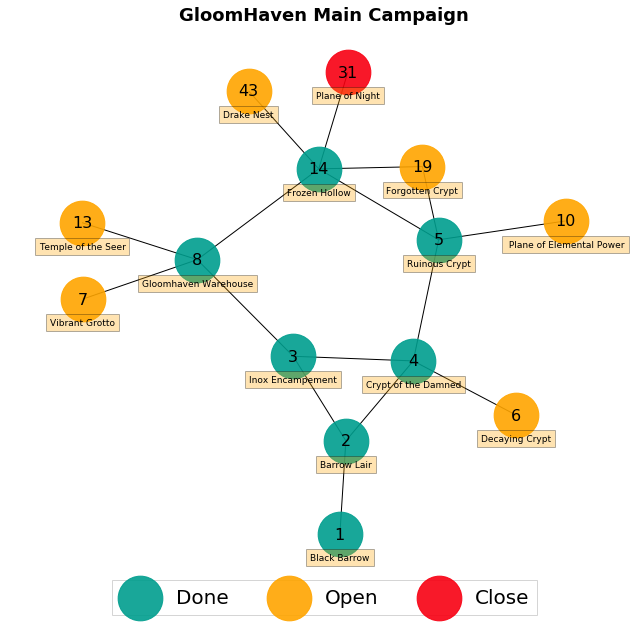

In [14]:
GloomHavenPlot("GloomEdgeList.csv", "GloomNodeCarac.csv", "GloomHaven Main Campaign")

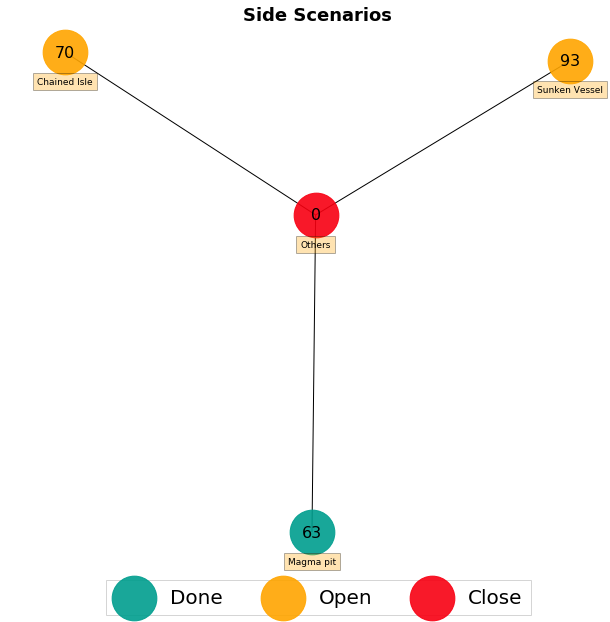

In [10]:
GloomHavenPlot("sideScenarios.csv", "GloomNodeCarac.csv", "Side Scenarios")

In [3]:

def GloomHavenPlot(edge_file, node_file, graph_title):
    import matplotlib.pyplot as plt
    import networkx as nx
    import pandas as pd

    # inputs & formating -------------------------------------------------------------------
    df = pd.read_csv(edge_file)
    carac = pd.read_csv(node_file, index_col= "ID")

    G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )   # network plot object

    carac=carac.loc[list(G.nodes()),:]  # extract informations of nodes present in G/df/GloomEdgeList.csv
    carac['status']=pd.Categorical(carac['status'])   # formating color in the graph
    carac['status'].cat.codes

    # extract node positions
    pos = nx.spring_layout(G)

    # frame with node infos (info+positions)
    pos_df = pd.DataFrame(pos, index = ("X","Y")).T
    pos_df.index.name = "ID"
    node_Info = pd.merge(pos_df, carac, left_index= True, right_index= True)
    
    node_labels = {}             # dict format needed
    for i in node_Info.index.values:
        node_labels[i] = i
    
    # plot -----------------------------------------------------------------------------------
    plt.figure(figsize=(10,10))

    rednodes = list(node_Info[node_Info["status"]== "Done"].index) 
    bluenodes = list(node_Info[node_Info["status"]== "Open"].index) 
    greennodes=list(node_Info[node_Info["status"]== "Close"].index) 

    nx.draw_networkx_nodes(G, pos=pos, nodelist=rednodes, node_color='#009E8E', label='Done', node_size=2000, alpha = 0.9)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=bluenodes, node_color='#FFA500', label='Open', node_size=2000, alpha = 0.9)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=greennodes, node_color='#F80012', label='Close', node_size=2000, alpha = 0.9)
    nx.draw_networkx_labels(G,pos,node_labels,font_size=16)
    nx.draw_networkx_edges(G, pos=pos)

    for i in node_Info.index:   # plt.text() does not accept arrays as inputs: loop needed
        x = node_Info.loc[i,"X"]
        y = node_Info.loc[i,"Y"]
        title = node_Info.loc[i,"title"]
        plt.text(x,y-0.1,
                 s=title, 
                 bbox=dict(facecolor='orange', alpha=0.3),
                 horizontalalignment='center',
                 size = 9)

    plt.title(graph_title, size = 18, fontweight="bold")
    plt.axis('off')    
    plt.legend(bbox_to_anchor=(0.9, 0.0),
          fancybox=False, shadow=False, ncol=3, prop={'size': 20})
    plt.show()